# Homework 01. Linear Programming.

MSCA 32013 Optimization and Simulation Methods. University of Chicago.

Group 7. Ben Ossyra, Peter Pezon. Yawen Zhang. 

## Solution 1.

Consider the following maximization problem.

\begin{equation} \max_{x}\ \ {x_1 + \frac{1}{4} x_2}\\ \mathrm{s.t.} \left\{ \begin{aligned} \frac{1}{2}x_1 + x_2 &\le 1\\ 2x_1 + x_2 &\le 2 \\ x_1 \ge 0, x_2 &\ge 0 \end{aligned}\right. \end{equation}

### A. Guess the solution. Plot the constraints and the objective function. Justify your guess.

Let $ x_1 = \{0,...,2\} $.

The constraints can be rewritten in terms of $x_1$:

$ x_2 \le 1 - \frac{1}{2}x_1 $

$ x_2 \le 2 - 2x_1 $

The objective function is a linear combination of $x_1$ and $x_2$, thus the surface function of the objective function visually looks like a ramp. The roots of the function and $b$ (where constraints are defined as $a_{1,i} x_{1,i} + ... + a_{n,i} x_{n,i} = b_i$) describe the intersection and slope of the ramp. Because the objective is linear and monotonically increasing, it's likely the maximum value of the objective function will occur at the intersection of the variable boundary and constraint. Therefore, we evaluate the objective functions at these intersections, and sort to find the maximum value.

The objective function is evaluated at various points.

At $x_1=0,x_2=0$: $ x_1 + \frac{1}{4}x_2 = 0 $. 

At $x_1=0,x_2=1$: $ x_1 + \frac{1}{4}x_2 = 0 + \frac{1}{4}1 = \frac{1}{4} $.

At $x_1= \frac{2}{3}, x_2=\frac{2}{3}$: $ x_1 + \frac{1}{4}x_2 = \frac{2}{3} + \frac{1}{6} = \frac{5}{6} $.

At $x_1=1,x_2=0$: $ x_1 + \frac{1}{4}x_2 = 1 + \frac{1}{4}0 = 1 $. This is the maximum value of the objective function. An increase in $x_2$ means a decrease in $x_1$, and the effect of $x_2$ is attenuated by 75%.

Check the first constraint:

$ \frac{1}{2}x_1 + x_2 = \frac{1}{2}1 + 0 = \frac{1}{2} \le 1 $

Check the second constraint:

$ 2x_1 + x_2 = 2(1) + 0 = 2 \le 2 $

Check the variable bounds:

$ x_1 = 1 \ge 0 $

$ x_2 = 0 \ge 0 $

$x_1$ and $x_2$ is within constraints and variable boundaries. Therefore, $(x_1,x_2)=(1,0)$ is the maximum value of the objective within the variable boundary and constraints, therefore it is the optimal solution.

Therefore, the objective function may be rewritten in terms of $x_1$ as $x_2 = 4 - 4x_1$ and plotted.

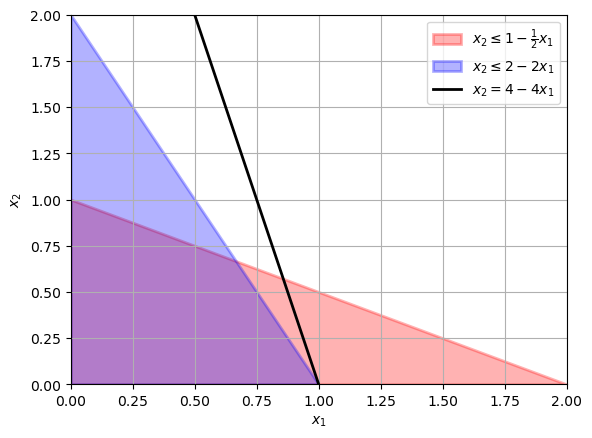

In [ ]:
using PyPlot

clf();

x1 = collect(0:0.1:2)
x2a = 1 .- 0.5 * x1
x2b = ifelse.(2 .- 2 * x1 .>= 0, 2 .- 2 * x1, NaN)
x2c = 4 .- 4 * x1

fig = figure()
ax = fig.add_subplot(1,1,1);
ax.fill_between(x1, x2a, color="red", linewidth=2,
    label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}", alpha=0.3)
ax.legend(loc="upper right")
ax.fill_between(x1, x2b, color="blue", linewidth=2,
    label=L"x_{2} \leq 2 - 2x_{1}", alpha=0.3)
ax.legend(loc="upper right")
ax.plot(x1, x2c, color="black", linewidth=2,
    label=L"x_{2} = 4 - 4x_{1}", alpha=1)
ax.legend(loc="upper right")
ax.set_xlabel(L"x_{1}");
ax.set_ylabel(L"x_{2}");
ax.grid(true)
ax[:set_xlim]([0,2])
ax[:set_ylim]([0,2]);

The plot shows that the objective function meets at a singular point in the feasible region (purple) bounded by the two constraints at $(x_1,x_2)=(1,0)$. This finding supports our earlier assertion.

### B. Using Julia define and solve the above problem 'as is'.

In [2]:
using JuMP, GLPK

# Preparing optimization model
m = Model(GLPK.Optimizer)

# Declaring variables
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

# Adding constraints
@constraint(m, constraint1, (1/2) * x1 + x2 <= 1)
@constraint(m, constraint2,     2 * x1 + x2 <= 2)

# Setting the objective
@objective(m, Max, x1 + (1/4) * x2)

# Printing the prepared optimization model
print(m)

# Solving the optimization problem
JuMP.optimize!(m)

# print the objective value
println("Objective value: ", JuMP.objective_value(m))

# Printing the optimal solutions obtained
println("x1 = ", JuMP.value(x1))  # => x1 = 1.0
println("x2 = ", JuMP.value(x2))  # => x2 = 0.0

# Printing the optimal dual variables
println("c1 = ", JuMP.shadow_price(constraint1))   # => c1 = 0.0
println("c2 = ", JuMP.shadow_price(constraint2))   # => c2 = 0.5

Objective value: 1.0
x1 = 1.0
x2 = 0.0
c1 = 0.0
c2 = 0.5


The GLPK Optimizer estimated the same coordinates $(x_1,x_2)=(1,0)$ for the maximum value of the objective function.

### C. Rewrite it in the standard form.

We say that a linear program is in standard form if the following are all true:

1. Non-negativity constraints for all variables.
2. All remaining constraints are expressed as equality constraints.
3. The right hand side vector, b, is non-negative.

In this case, the variables have non-negative constraints $ x_i \ge 0 $ and $b_i$ are non-negative. However the "$\ge$" inequality constraint needs to be converted. It is converted by adding a slack variable. The inequality constraint becomes the equality constraint: $ \frac{1}{2}x_1 + x_2 + s_1 = 1 $ and $ 2x_1 + x_2 + s_2 = 2 $. The slack variables $ s_1, s_2 $ are non-negative $ s_i \ge 0 $. 

Thus the linear program in standard form is:


$$ \begin{equation} \min_{x}\ \ {-x_1 - \frac{1}{4} x_2}\\ \mathrm{s.t.} \left\{ \begin{aligned} \frac{1}{2}x_1 + x_2 +s_1 &= 1\\ 2x_1 + x_2 + s_2 &= 2 \\ x_1 \ge 0, x_2 &\ge 0\\ s_1 \ge 0, s_2 &\ge 0 \end{aligned}\right. \end{equation} $$


---

[1] "[Converting a Linear Program to Standard Form](https://ocw.mit.edu/courses/15-053-optimization-methods-in-management-science-spring-2013/257e9a3322667b121cb3a8498523e6f2_MIT15_053S13_tut06.pdf)." Optimizaiton Methods in Management Science/Operations Research 15.053/0.58. MIT OpenCourseWare. 

### D. Using Julia define and solve the above problem in the standard form.

Note: have to use `==` equality in JuMP constraint.

---

[1] [Constaints - JuMP](https://jump.dev/JuMP.jl/stable/manual/constraints/) 

In [1]:
using JuMP, GLPK

# Preparing optimization model
m = Model(GLPK.Optimizer)

# Declaring variables
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, s1 >= 0)
@variable(m, s2 >= 0)

# Adding constraints
@constraint(m, constraint1, (1/2) * x1 + x2 + s1 == 1)
@constraint(m, constraint2,     2 * x1 + x2 + s2 == 2)

# Setting the objective
@objective(m, Min, -x1 - (1/4) * x2)

# Printing the prepared optimization model
print(m)

# Solving the optimization problem
JuMP.optimize!(m)

#print the object value
println("Objective value: ", JuMP.objective_value(m))

# Printing the optimal solutions obtained
println("x1 = ", JuMP.value(x1))  # => x1 = 1.0
println("x2 = ", JuMP.value(x2))  # => x2 = 0.0

# Printing the optimal dual variables
println("c1 = ", JuMP.shadow_price(constraint1))   # => c1 = 0.0
println("c2 = ", JuMP.shadow_price(constraint2))   # => c2 = -0.5

Objective value: -1.0
x1 = 1.0
x2 = 0.0
c1 = 0.0
c2 = -0.5


### E. Compare the solutions in item $B$ and $D$.

In $B$, the linear problem was defined with the following variables and constraints:

```julia
@objective(m, Max, x1 + (1/4) * x2)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, constraint1, (1/2) * x1 + x2 <= 1)
@constraint(m, constraint2,     2 * x1 + x2 <= 2)
```

To change the problem into the standard form, slack variables with non-negative boundary are declared. Constraints include slack variable and inequality `<=` is converted to an equality `==`.

```julia
@objective(m, Min, -x1 - (1/4) * x2)
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, s1 >= 0)
@variable(m, s2 >= 0)
@constraint(m, constraint1, (1/2) * x1 + x2 + s1 == 1)
@constraint(m, constraint2,     2 * x1 + x2 + s2 == 2)
```

The coordinate solution found by the solver is the same in $B$ and $D$: $(x_1,x_2)=(1,0)$. However, the values of the objective function and constraints are negative complimentaries of each other. The value of the objective function is $1.0$ in $B$ and $-1.0$ in $D$, while the value of the constraints evaluated at $(x_1,x_2)=(1,0)$ are valued at $0.0$ and $0.5$ in $B$, respectively; while in $D$ the constraints are valued at $0.0$ and $-0.5$, respectively. This is because the linear problem was transformed from a maximization problem into a minimization problem by multiplying the terms by $-1.0$, or the negative compliment. 

At first glance, it seems unnecessary to write the problem in standard form, at least in these simple cases, because Julia and JuMP are fully capable of converting the problem into standard form and solving the answers on its own.

### F. Rework items A and B if the objective function is $x1+x2$.

\begin{equation} \max_{x}\ \ {x_1 + \ x_2}\\ \mathrm{s.t.} \left\{ \begin{aligned} \frac{1}{2}x_1 + x_2 &\le 1\\ 2x_1 + x_2 &\le 2 \\ x_1 \ge 0, x_2 &\ge 0 \end{aligned}\right. \end{equation}

#### Part A. Guess the solution. Plot the constraints and the objective function. Justify your guess.

Let $ x_1 = \{0,...,2\} $.

The constraints can be rewritten in terms of $x_1$:

$ x_2 \le 1 - \frac{1}{2}x_1 $

$ x_2 \le 2 - 2x_1 $


The objective function is evaluated at critical points.

At $x_1=0,x_2=0$: $ x_1 + x_2 = 0 $. 

At $x_1=0,x_2=1$: $ x_1 + x_2 = 0 + 1 = 1 $.

At $x_1=1,x_2=0$: $ x_1 + x_2 = 1 + 0 = 1 $.

At $x_1= \frac{2}{3}, x_2=\frac{2}{3}$: $ x_1 + x_2 = \frac{2}{3} + \frac{2}{3} = \frac{4}{3} $.  This is the maximum value of the objective function. 

Check the first constraint:

$ \frac{1}{2}x_1 + x_2 = \frac{1}{2}(\frac{2}{3}) + \frac{2}{3} = 1 \le 1 $

Check the second constraint:

$ 2x_1 + x_2 = 2(\frac{2}{3}) + \frac{2}{3} = 1.5 \le 2 $

Check the variable bounds:

$ x_1 = \frac{2}{3} \ge 0 $

$ x_2 = \frac{2}{3} \ge 0 $

$x_1$ and $x_2$ is within constraints and variable boundaries. Therefore, $(x_1,x_2)=(\frac{2}{3},\frac{2}{3})$ is the maximum value of the objective within the variable boundary and constraints, therefore it is the optimal solution.

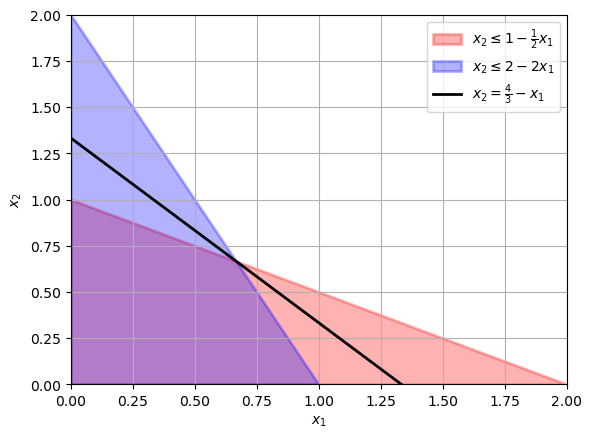

In [4]:
using PyPlot
clf();

x1 = collect(0:0.1:2)
x2a = 1 .- 0.5 * x1
x2b = ifelse.(2 .- 2 * x1 .>= 0, 2 .- 2 * x1, NaN)
x2c = (4/3) .- x1

fig = figure()
ax = fig.add_subplot(1,1,1);
ax.fill_between(x1, x2a, color="red", linewidth=2,
    label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}", alpha=0.3)
ax.legend(loc="upper right")
ax.fill_between(x1, x2b, color="blue", linewidth=2,
    label=L"x_{2} \leq 2 - 2x_{1}", alpha=0.3)
ax.legend(loc="upper right")
ax.plot(x1, x2c, color="black", linewidth=2,
    label=L"x_{2} = \frac{4}{3} - x_{1}", alpha=1)
ax.legend(loc="upper right")
ax.set_xlabel(L"x_{1}");
ax.set_ylabel(L"x_{2}");
ax.grid(true)
ax[:set_xlim]([0,2])
ax[:set_ylim]([0,2]);

#### Part B. Using Julia define and solve the above problem 'as is'.

In [3]:
using JuMP, GLPK

# Preparing optimization model
m = Model(GLPK.Optimizer)

# Declaring variables
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

# Adding constraints
@constraint(m, constraint1, (1/2) * x1 + x2 <= 1)
@constraint(m, constraint2,     2 * x1 + x2 <= 2)

# Setting the objective
@objective(m, Max, x1 +  x2)

# Printing the prepared optimization model
print(m)

# Solving the optimization problem
JuMP.optimize!(m)

#print the objective value
println("Objective value: ", JuMP.objective_value(m))

# Printing the optimal solutions obtained
println("x1 = ", JuMP.value(x1))  # => x1 = 2/3
println("x2 = ", JuMP.value(x2))  # => x2 = 2/3

# Printing the optimal dual variables
println("c1 = ", JuMP.shadow_price(constraint1))   # => c1 = 2/3
println("c2 = ", JuMP.shadow_price(constraint2))   # => c2 = 1/3

Objective value: 1.3333333333333335
x1 = 0.6666666666666667
x2 = 0.6666666666666666
c1 = 0.6666666666666666
c2 = 0.33333333333333337
